<a href="https://colab.research.google.com/github/PietraValen/HackathonCC/blob/main/Previs%C3%A3o_e_Analise_Climatica_de_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

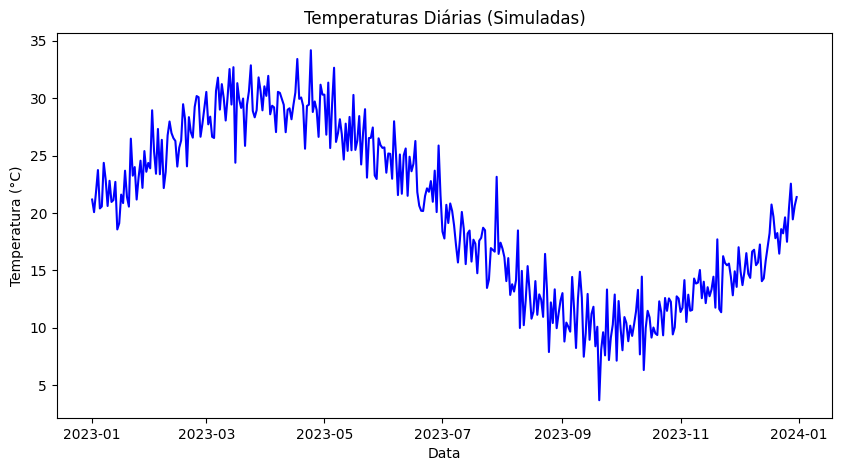

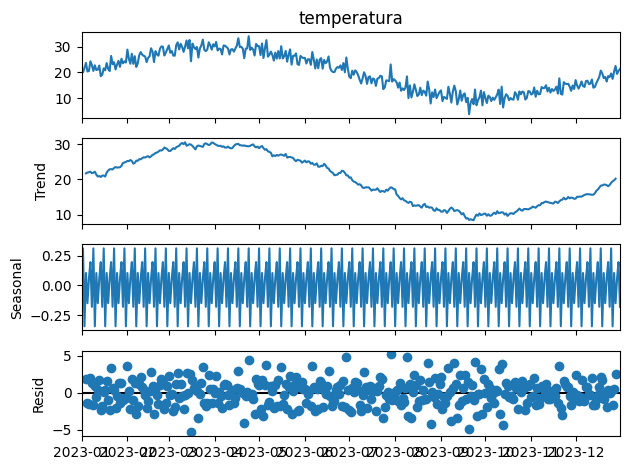

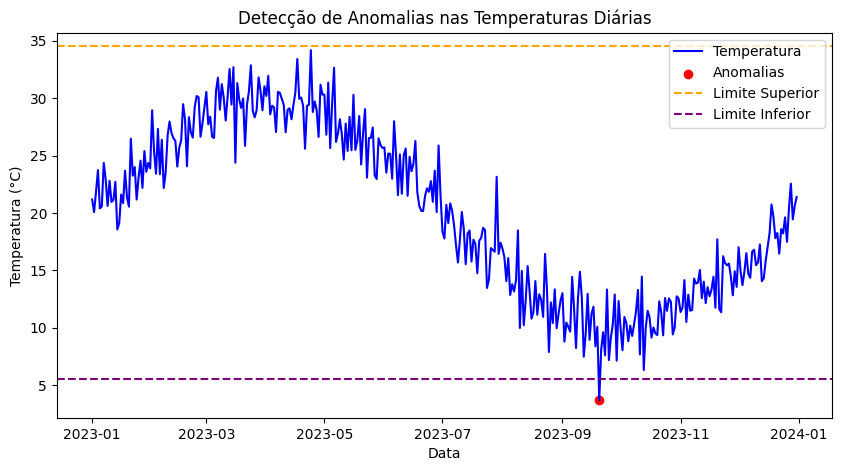

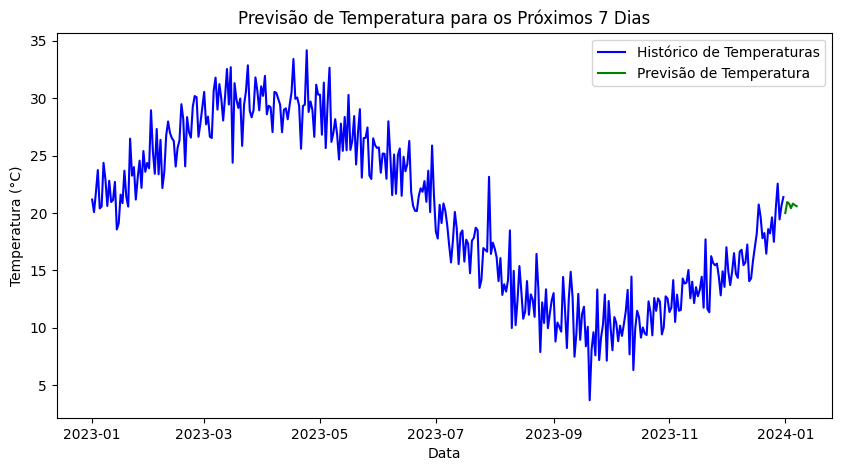

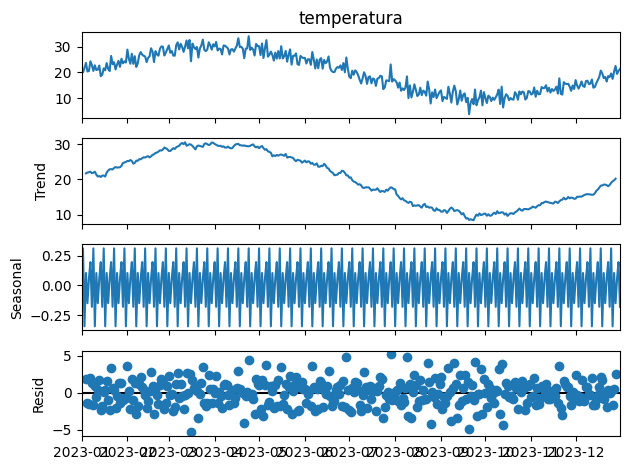

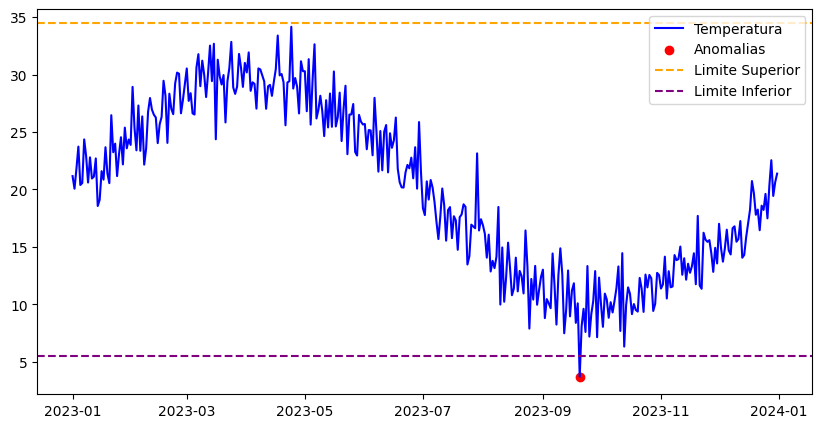

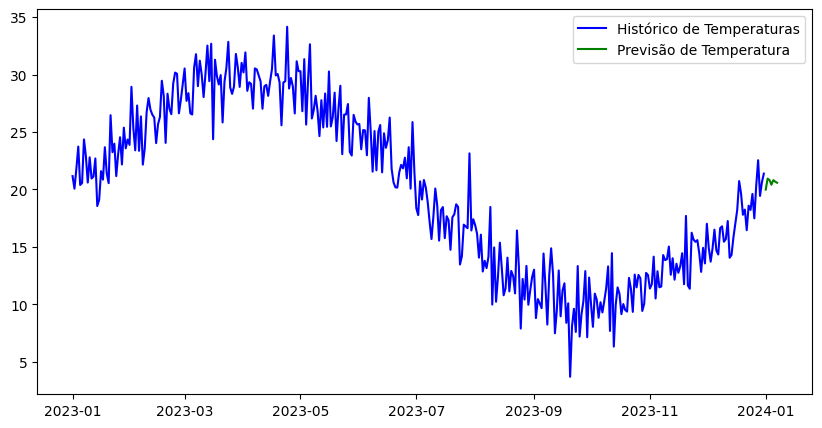

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# 1. Gerar Dados Sintéticos
np.random.seed(42)
# Simular 365 dias de dados de temperatura com uma tendência sazonal e ruído aleatório
date_range = pd.date_range(start='2023-01-01', periods=365, freq='D')
temperatura = 20 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 2, size=365)

# Criar DataFrame
dados = pd.DataFrame({'temperatura': temperatura}, index=date_range)

# 2. Visualizar Dados de Temperatura
plt.figure(figsize=(10, 5))
plt.plot(dados, color='blue')
plt.title('Temperaturas Diárias (Simuladas)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.show()

# 3. Decomposição da Série Temporal para Identificar Tendências e Sazonalidade
decomposicao = seasonal_decompose(dados['temperatura'], model='additive')
decomposicao.plot()
plt.show()

# 4. Detecção de Anomalias
media = dados['temperatura'].mean()
desvio_padrao = dados['temperatura'].std()

# Definir limites para detectar anomalias (acima/below de 2 desvios padrão)
limite_superior = media + 2 * desvio_padrao
limite_inferior = media - 2 * desvio_padrao

# Filtrar anomalias
anomalies = dados[(dados['temperatura'] > limite_superior) | (dados['temperatura'] < limite_inferior)]

# Visualizar anomalias
plt.figure(figsize=(10, 5))
plt.plot(dados, color='blue', label='Temperatura')
plt.scatter(anomalies.index, anomalies['temperatura'], color='red', label='Anomalias')
plt.axhline(limite_superior, color='orange', linestyle='--', label='Limite Superior')
plt.axhline(limite_inferior, color='purple', linestyle='--', label='Limite Inferior')
plt.title('Detecção de Anomalias nas Temperaturas Diárias')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# 5. Previsão de Temperatura com ARIMA
# Definindo e ajustando o modelo ARIMA
modelo_arima = ARIMA(dados['temperatura'], order=(5, 1, 0))  # Parâmetros (p, d, q) ajustáveis
modelo_ajustado = modelo_arima.fit()

# Fazer previsão para os próximos 7 dias
previsao = modelo_ajustado.forecast(steps=7)
previsao.index = pd.date_range(start=dados.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')

# Visualizar a previsão com os dados históricos
plt.figure(figsize=(10, 5))
plt.plot(dados, color='blue', label='Histórico de Temperaturas')
plt.plot(previsao, color='green', label='Previsão de Temperatura')
plt.title('Previsão de Temperatura para os Próximos 7 Dias')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# 6. Estrutura Final de Funções para Facilitar a Reutilização
def carregar_dados_sinteticos():
    np.random.seed(42)
    date_range = pd.date_range(start='2023-01-01', periods=365, freq='D')
    temperatura = 20 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 2, size=365)
    return pd.DataFrame({'temperatura': temperatura}, index=date_range)

def decompor_serie(dados):
    decomposicao = seasonal_decompose(dados['temperatura'], model='additive')
    decomposicao.plot()
    plt.show()

def detectar_anomalias(dados):
    media = dados['temperatura'].mean()
    desvio_padrao = dados['temperatura'].std()
    limite_superior = media + 2 * desvio_padrao
    limite_inferior = media - 2 * desvio_padrao
    return dados[(dados['temperatura'] > limite_superior) | (dados['temperatura'] < limite_inferior)]

def visualizar_anomalias(dados, anomalies):
    plt.figure(figsize=(10, 5))
    plt.plot(dados, color='blue', label='Temperatura')
    plt.scatter(anomalies.index, anomalies['temperatura'], color='red', label='Anomalias')
    plt.axhline(dados['temperatura'].mean() + 2 * dados['temperatura'].std(), color='orange', linestyle='--', label='Limite Superior')
    plt.axhline(dados['temperatura'].mean() - 2 * dados['temperatura'].std(), color='purple', linestyle='--', label='Limite Inferior')
    plt.legend()
    plt.show()

def prever_temperatura(dados, dias=7):
    modelo_arima = ARIMA(dados['temperatura'], order=(5, 1, 0))
    modelo_ajustado = modelo_arima.fit()
    previsao = modelo_ajustado.forecast(steps=dias)
    previsao.index = pd.date_range(start=dados.index[-1] + pd.Timedelta(days=1), periods=dias, freq='D')
    return previsao

# Chamando as funções para execução completa do projeto
dados = carregar_dados_sinteticos()
decompor_serie(dados)
anomalies = detectar_anomalias(dados)
visualizar_anomalias(dados, anomalies)
previsao = prever_temperatura(dados)

# Visualizar previsão final
plt.figure(figsize=(10, 5))
plt.plot(dados, color='blue', label='Histórico de Temperaturas')
plt.plot(previsao, color='green', label='Previsão de Temperatura')
plt.legend()
plt.show()


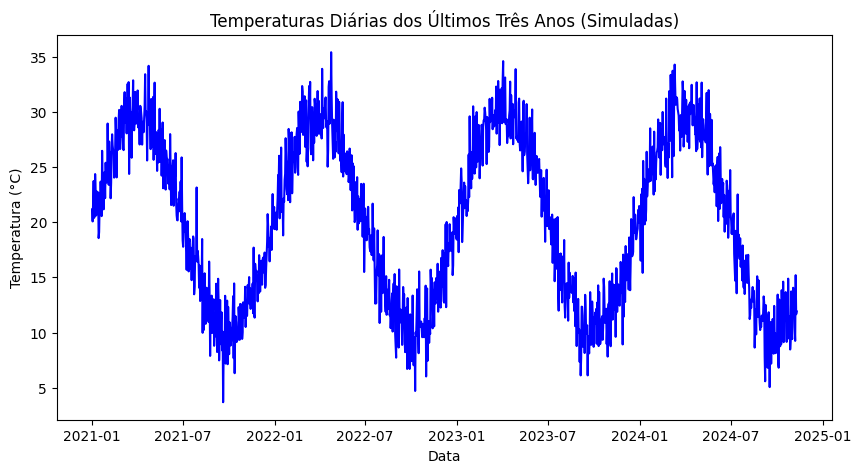

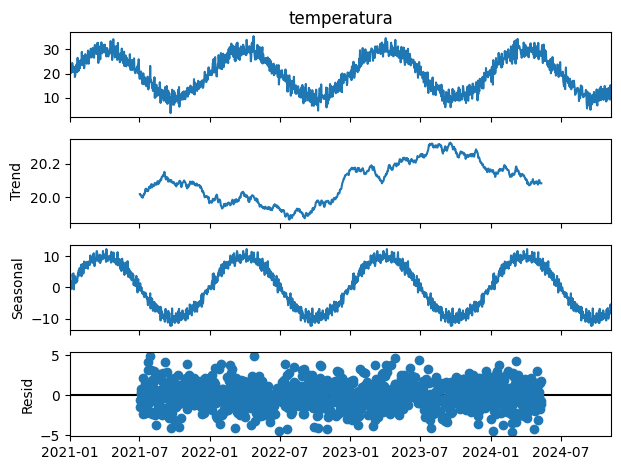

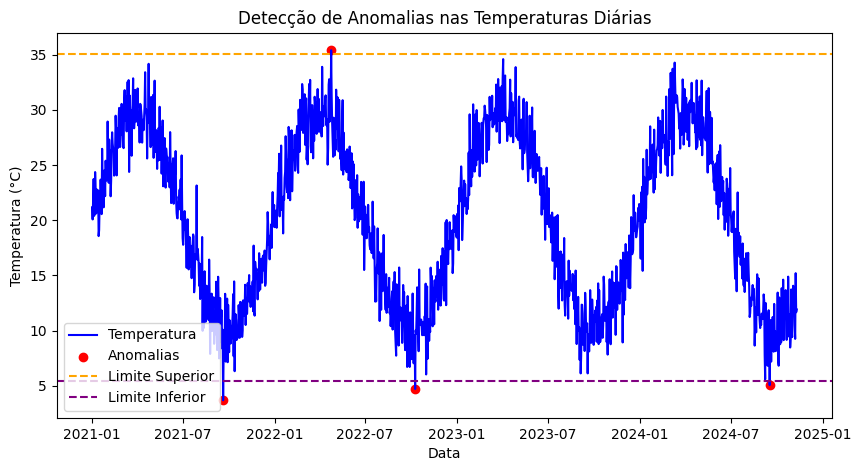

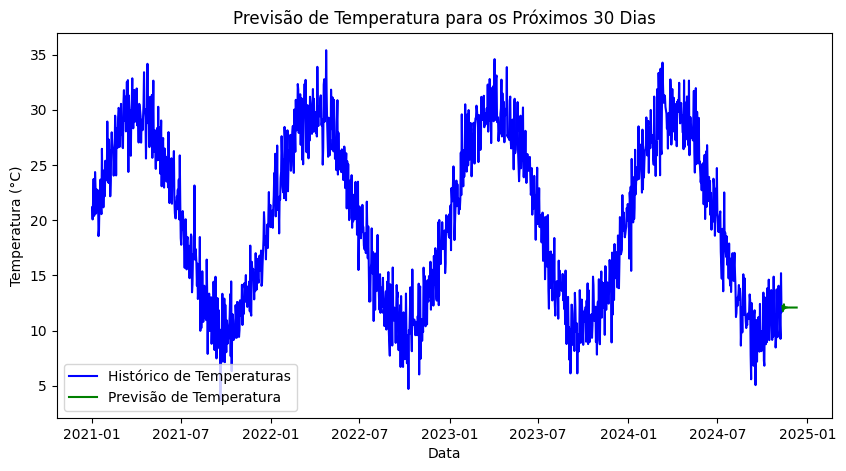

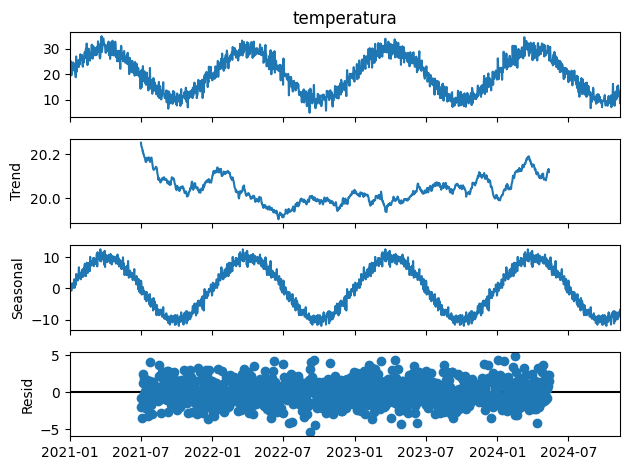

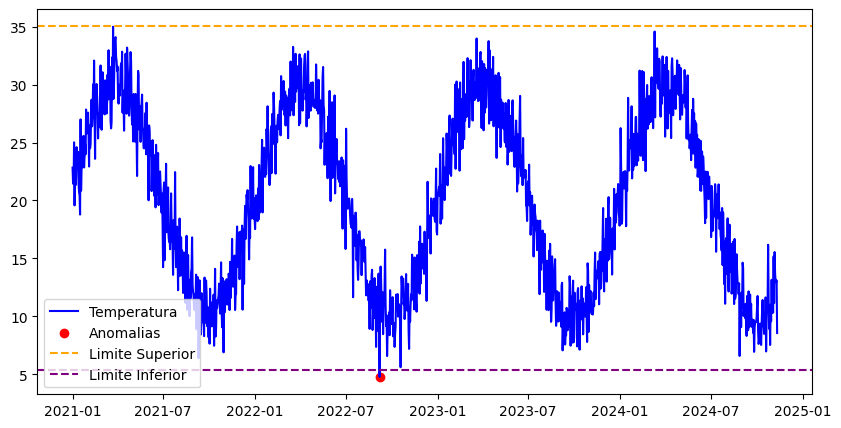

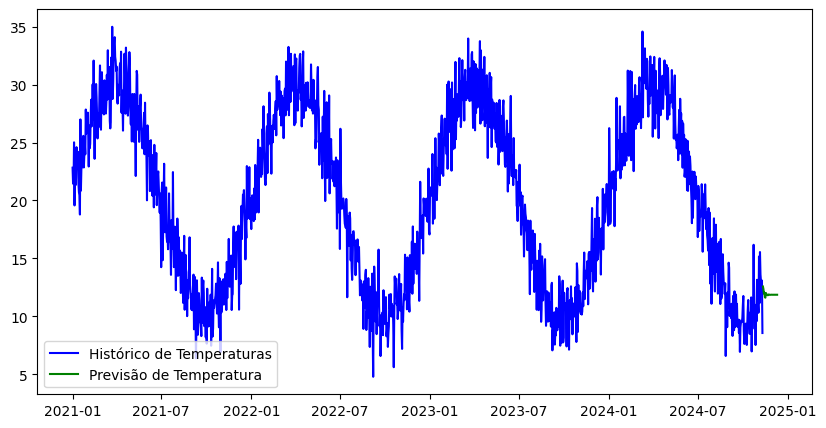

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import datetime

# 1. Gerar Dados Sintéticos para os Últimos Três Anos
np.random.seed(42)
# Criar uma série temporal de temperatura com uma tendência sazonal e ruído aleatório
date_range = pd.date_range(start='2021-01-01', end=datetime.date.today(), freq='D')
temperatura = 20 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 2, len(date_range))

# Criar DataFrame com o índice de datas
dados = pd.DataFrame({'temperatura': temperatura}, index=date_range)

# 2. Visualizar Dados de Temperatura
plt.figure(figsize=(10, 5))
plt.plot(dados, color='blue')
plt.title('Temperaturas Diárias dos Últimos Três Anos (Simuladas)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.show()

# 3. Decomposição da Série Temporal para Identificar Tendências e Sazonalidade
decomposicao = seasonal_decompose(dados['temperatura'], model='additive', period=365)
decomposicao.plot()
plt.show()

# 4. Detecção de Anomalias
media = dados['temperatura'].mean()
desvio_padrao = dados['temperatura'].std()

# Definir limites para detectar anomalias (acima/below de 2 desvios padrão)
limite_superior = media + 2 * desvio_padrao
limite_inferior = media - 2 * desvio_padrao

# Filtrar anomalias
anomalies = dados[(dados['temperatura'] > limite_superior) | (dados['temperatura'] < limite_inferior)]

# Visualizar anomalias
plt.figure(figsize=(10, 5))
plt.plot(dados, color='blue', label='Temperatura')
plt.scatter(anomalies.index, anomalies['temperatura'], color='red', label='Anomalias')
plt.axhline(limite_superior, color='orange', linestyle='--', label='Limite Superior')
plt.axhline(limite_inferior, color='purple', linestyle='--', label='Limite Inferior')
plt.title('Detecção de Anomalias nas Temperaturas Diárias')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# 5. Previsão de Temperatura com ARIMA
# Definindo e ajustando o modelo ARIMA
modelo_arima = ARIMA(dados['temperatura'], order=(5, 1, 0))  # Parâmetros (p, d, q) ajustáveis
modelo_ajustado = modelo_arima.fit()

# Fazer previsão para os próximos 30 dias
previsao = modelo_ajustado.forecast(steps=30)
previsao.index = pd.date_range(start=dados.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Visualizar a previsão com os dados históricos
plt.figure(figsize=(10, 5))
plt.plot(dados, color='blue', label='Histórico de Temperaturas')
plt.plot(previsao, color='green', label='Previsão de Temperatura')
plt.title('Previsão de Temperatura para os Próximos 30 Dias')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# 6. Estrutura Final de Funções para Reutilização
def carregar_dados_sinteticos():
    date_range = pd.date_range(start='2021-01-01', end=datetime.date.today(), freq='D')
    temperatura = 20 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 2, len(date_range))
    return pd.DataFrame({'temperatura': temperatura}, index=date_range)

def decompor_serie(dados):
    decomposicao = seasonal_decompose(dados['temperatura'], model='additive', period=365)
    decomposicao.plot()
    plt.show()

def detectar_anomalias(dados):
    media = dados['temperatura'].mean()
    desvio_padrao = dados['temperatura'].std()
    limite_superior = media + 2 * desvio_padrao
    limite_inferior = media - 2 * desvio_padrao
    return dados[(dados['temperatura'] > limite_superior) | (dados['temperatura'] < limite_inferior)]

def visualizar_anomalias(dados, anomalies):
    plt.figure(figsize=(10, 5))
    plt.plot(dados, color='blue', label='Temperatura')
    plt.scatter(anomalies.index, anomalies['temperatura'], color='red', label='Anomalias')
    plt.axhline(dados['temperatura'].mean() + 2 * dados['temperatura'].std(), color='orange', linestyle='--', label='Limite Superior')
    plt.axhline(dados['temperatura'].mean() - 2 * dados['temperatura'].std(), color='purple', linestyle='--', label='Limite Inferior')
    plt.legend()
    plt.show()

def prever_temperatura(dados, dias=30):
    modelo_arima = ARIMA(dados['temperatura'], order=(5, 1, 0))
    modelo_ajustado = modelo_arima.fit()
    previsao = modelo_ajustado.forecast(steps=dias)
    previsao.index = pd.date_range(start=dados.index[-1] + pd.Timedelta(days=1), periods=dias, freq='D')
    return previsao

# Chamando as funções para execução completa do projeto
dados = carregar_dados_sinteticos()
decompor_serie(dados)
anomalies = detectar_anomalias(dados)
visualizar_anomalias(dados, anomalies)
previsao = prever_temperatura(dados)

# Visualizar previsão final
plt.figure(figsize=(10, 5))
plt.plot(dados, color='blue', label='Histórico de Temperaturas')
plt.plot(previsao, color='green', label='Previsão de Temperatura')
plt.legend()
plt.show()
